In [1]:
import tensorflow as tf
from keras.layers import Input, Dense, BatchNormalization, Dropout
from keras.models import Model, load_model
from keras.datasets import cifar10
from keras.regularizers import l1, l2
from keras.optimizers import Adam, SGD
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Load and Preprocess the dataset

In [2]:
# load the dataset
(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))

170500096/170498071 [==============================] - 6s 0us/step


# Define the model

In [3]:
input_layer = x_train.shape[1]
hid_layer1 = 1728
hid_layer2 = 768
hid_layer3 = 192
hid_layer4 = 10
hid_layer5 = hid_layer3
hid_layer6 = hid_layer2
hid_layer7 = hid_layer1
output_layer = input_layer
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [4]:
input_img = Input(shape=(input_layer,))

W0903 16:15:28.068924 139704630986624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0903 16:15:28.115559 139704630986624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [5]:
# network architecture
# vanilla autoencoder with fully-connected layer
# ENCODER
x = Dense(units = hid_layer1, activation='relu')(input_img)
# x = BatchNormalization()(x)
x = Dense(units = hid_layer2, activation='relu')(x)
# x = BatchNormalization()(x)
x = Dense(units = hid_layer3, activation='relu')(x)
# x = BatchNormalization()(x)

encoded = Dense(units = hid_layer4, activation='relu',kernel_regularizer = l2(3e-5), activity_regularizer = l1(10e-12))(x)

# DECODER
x = Dense(units = hid_layer5, activation = 'relu')(encoded)
# x = BatchNormalization()(x)
x = Dense(units = hid_layer6, activation='relu')(x)
# x = BatchNormalization()(x)
x = Dense(units = hid_layer7, activation='relu')(x)
# x = BatchNormalization()(x)

decoded = Dense(units = output_layer, activation='sigmoid')(x)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer= Adam(lr = 1e-5), loss='mean_absolute_error')

W0903 16:15:31.558915 139704630986624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0903 16:15:31.704416 139704630986624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



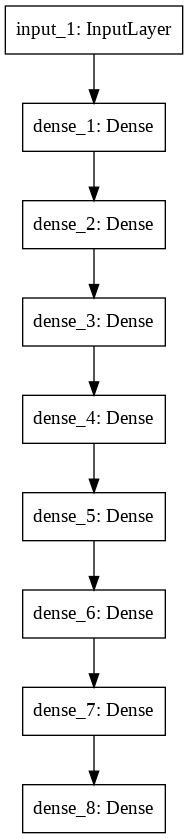

In [6]:
from keras.utils import plot_model
plot_model(autoencoder, to_file='model.png')

In [7]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1728)              5310144   
_________________________________________________________________
dense_2 (Dense)              (None, 768)               1327872   
_________________________________________________________________
dense_3 (Dense)              (None, 192)               147648    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1930      
_________________________________________________________________
dense_5 (Dense)              (None, 192)               2112      
_________________________________________________________________
dense_6 (Dense)              (None, 768)               1482

# Train Model

In [0]:
# train the model
history = autoencoder.fit(x_train, x_train,
                          epochs=20,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test, x_test))

W0820 22:04:23.493149 139940633401216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0820 22:04:23.818946 139940633401216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 15s 307us/step - loss: 0.1918 - val_loss: 0.1681
Epoch 2/20
50000/50000 [==============================] - 11s 218us/step - loss: 0.1598 - val_loss: 0.1561
Epoch 3/20
50000/50000 [==============================] - 11s 216us/step - loss: 0.1543 - val_loss: 0.1526
Epoch 4/20
50000/50000 [==============================] - 11s 216us/step - loss: 0.1498 - val_loss: 0.1464
Epoch 5/20
50000/50000 [==============================] - 11s 215us/step - loss: 0.1433 - val_loss: 0.1398
Epoch 6/20
50000/50000 [==============================] - 11s 216us/step - loss: 0.1380 - val_loss: 0.1348
Epoch 7/20
50000/50000 [==============================] - 11s 216us/step - loss: 0.1321 - val_loss: 0.1293
Epoch 8/20
50000/50000 [==============================] - 11s 216us/step - loss: 0.1284 - val_loss: 0.1278
Epoch 9/20
50000/50000 [==============================] - 11s 215us/step - loss: 0.1267 - val_

dict_keys(['val_loss', 'loss'])


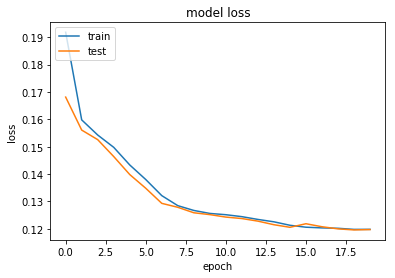

In [0]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

autoencoder.save('/content/gdrive/My Drive/autoencoder_simple_nlp.h5')

# (Optional) Load Pre-Trained Model

In [0]:
from keras.models import load_model
from google.colab import drive

drive.mount('/content/gdrive')
autoencoder = load_model('/content/gdrive/My Drive/checkpoints/autoencoder_simple_nlp.h5')
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer(index = 4).output)

# Reconstruction Results

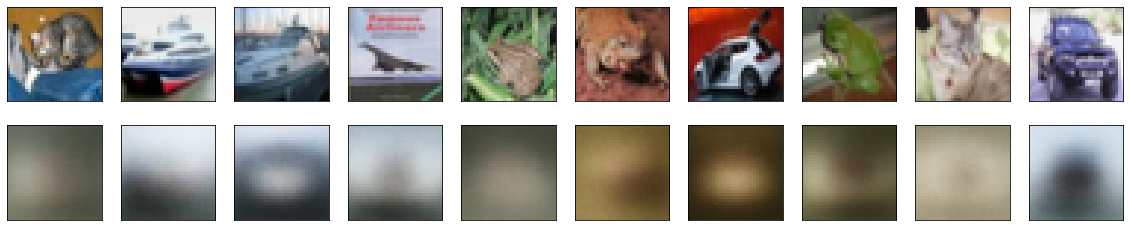

In [4]:
# show the result at the decoder output
decoded_imgs = autoencoder.predict(x_test)

counter = 0
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[counter + i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[counter + i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

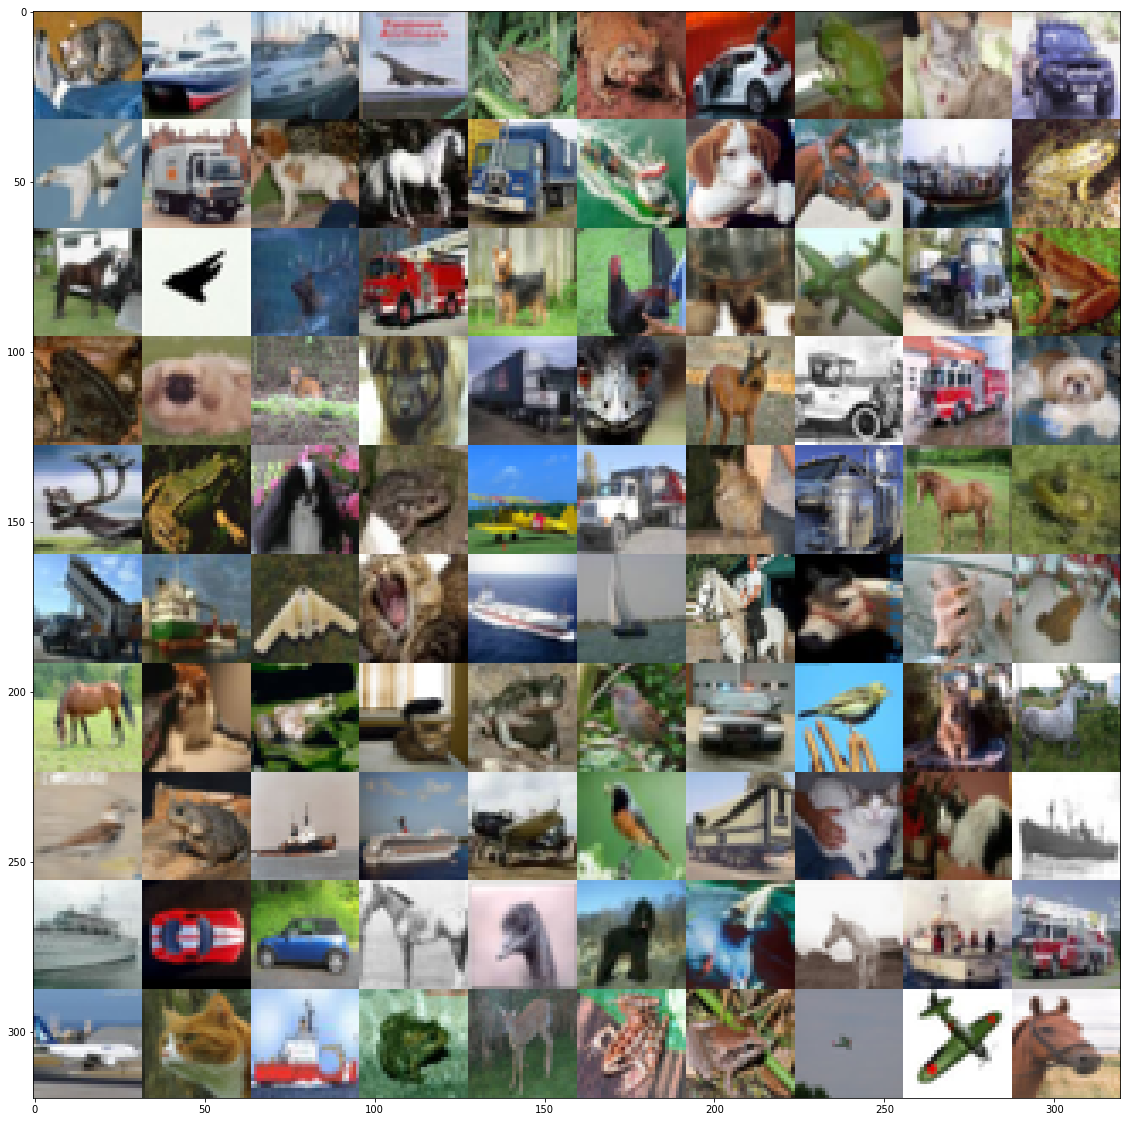

In [5]:
# display test images generated from latent vector
n = 10
img_size = 32
img_chns = 3
figure = np.zeros((img_size * n, img_size * n, img_chns))
test_imgs = np.zeros((32,32,3))
counter = 0

for i in range(n):
    for j in range(n):
      #test_imgs[:,:,0] = xtest_red[counter].reshape(32, 32)
      #test_imgs[:,:,1] = xtest_green[counter].reshape(32, 32)
      #test_imgs[:,:,2] = xtest_blue[counter].reshape(32, 32)

      figure[(i * img_size) : (i + 1) * img_size, (j * img_size) : (j + 1) * img_size] = x_test[counter].reshape(32,32,3)
      counter = counter + 1


plt.figure(figsize=(20, 20))
plt.imshow(figure)
plt.show()

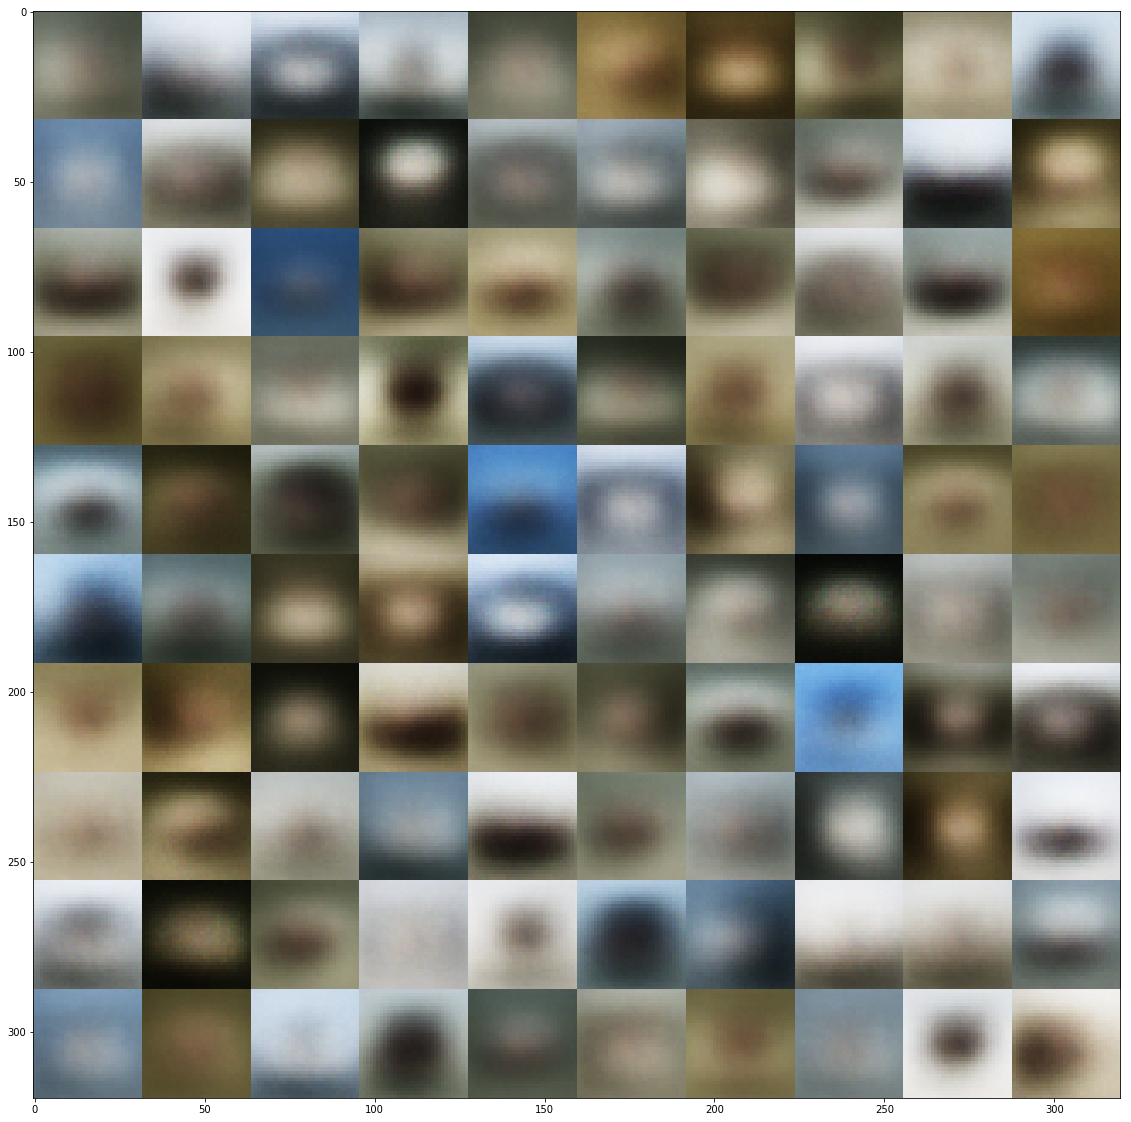

In [6]:
# display reconstructed images generated from latent vector
n = 10
img_size = 32
img_chns = 3
figure = np.zeros((img_size * n, img_size * n, img_chns))
dec_imgs = np.zeros((32,32,3))
counter = 0

for i in range(n):
    for j in range(n):
      #dec_imgs[:,:,0] = decoded_imgs_red[counter + i].reshape(32, 32)
      #dec_imgs[:,:,1] = decoded_imgs_green[counter + i].reshape(32, 32)
      #dec_imgs[:,:,2] = decoded_imgs_blue[counter + i].reshape(32, 32)

      figure[(i * img_size) : (i + 1) * img_size, (j * img_size) : (j + 1) * img_size] = decoded_imgs[counter].reshape(32,32,3)
      counter = counter + 1


plt.figure(figsize=(20, 20))
plt.imshow(figure)
plt.show()

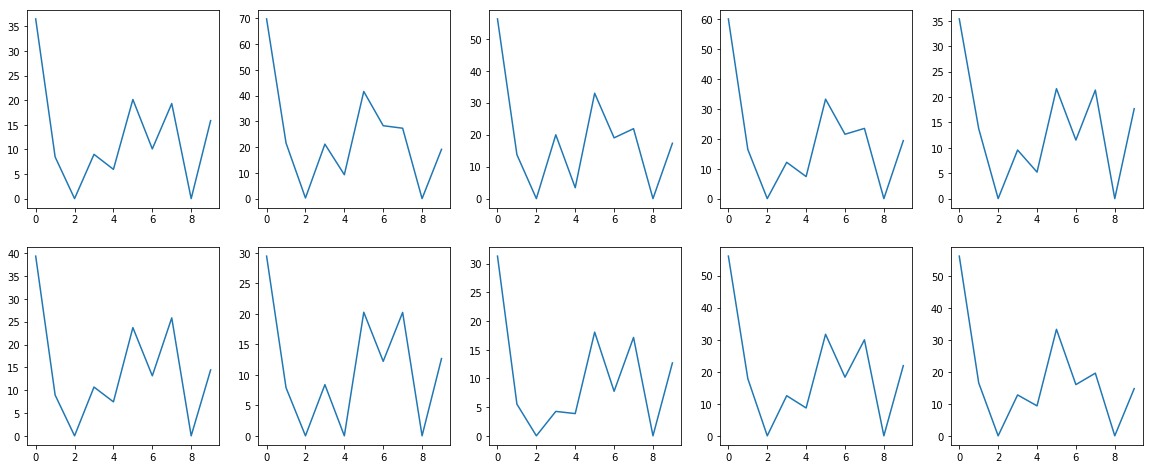

In [0]:
# show the representation at the bottleneck
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(2, 5, i + 1)
    plt.plot(encoded_imgs[counter + i])
    # plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()